In [1]:
!git clone https://github.com/hungpham13/Distributed-data-discretization
%cd Distributed-data-discretization/

Cloning into 'Distributed-data-discretization'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 10), reused 7 (delta 3), pack-reused 0
Unpacking objects: 100% (23/23), done.
/content/Distributed-data-discretization


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# data_true = pd.read_csv('2021D1.csv')
# data_false = pd.read_csv('OtherD1.csv')

In [ ]:
# data_true['Label'] = 0
# data_false['Label'] = 1
# data = pd.concat([data_true,data_false], ignore_index=True)
# data = data.drop(columns='Unnamed: 0')
# data = data.sample(frac=1, ignore_index=True)

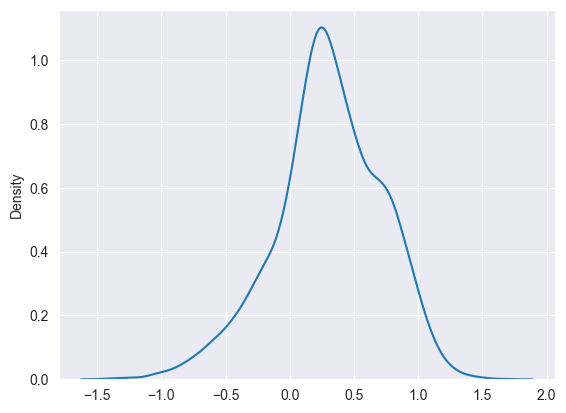

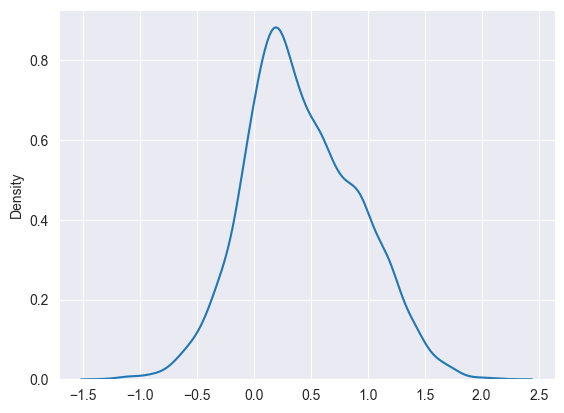

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Label
0,0.318188,0.262460,0.272121,0.316768,0.473171,-0.503784,-0.023241,-0.350003,-0.437289,0.642953,...,0.094037,0.159518,0.190344,0.021303,0.236529,0.491315,0.133208,0.402896,0.105314,0
1,0.390623,-0.308671,-0.357119,0.611077,0.238026,-0.002597,0.244755,0.415099,0.149271,-0.090636,...,0.129160,0.236618,0.016429,0.360443,0.341119,0.235773,0.241922,0.025960,0.265339,0
2,0.637402,0.525859,-0.016133,0.638866,0.409476,0.179855,0.363958,0.628088,0.471679,0.251237,...,-0.058361,0.284438,0.234794,0.251183,0.280087,-0.002004,0.599050,0.057463,0.116623,0
3,0.599866,0.045923,0.065858,0.065531,0.572074,0.301736,0.921398,0.961985,0.323622,-0.535095,...,0.118520,0.000697,0.333833,0.318361,-0.002537,0.272950,0.200825,0.052456,0.189513,0
4,0.450153,-0.147197,0.645795,0.749986,-0.035150,0.177962,0.402663,0.862715,0.565840,0.727475,...,0.232446,0.068126,0.152149,0.208777,0.329099,-0.106913,0.327585,0.568747,0.357198,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.424260,0.206844,0.375778,0.272114,0.237075,0.935628,0.365824,0.803398,0.266381,0.897119,...,0.155688,0.281319,0.436615,0.193746,0.095420,0.308598,0.154299,0.131188,0.391516,0
496,-0.521838,0.147638,0.169462,0.546139,0.750117,0.421096,-0.207665,0.316954,0.328833,0.026594,...,0.073580,0.176903,0.185145,0.028787,0.170157,0.458814,0.302242,0.444725,0.177393,0
497,-0.153514,0.521044,0.572518,0.519181,-0.083495,0.382076,0.510535,0.663017,0.148284,0.485855,...,0.179619,0.435858,-0.109414,0.321515,0.476119,0.212426,0.189185,0.315821,0.316930,0
498,0.793786,1.134149,0.323570,0.242186,0.115952,0.659735,0.248482,0.538100,0.410423,0.862765,...,0.279019,0.259711,0.136699,-0.168943,0.244292,0.405553,0.138280,0.045010,0.144849,0


In [2]:
# data = pd.read_csv('data.csv')
# data = data.drop(columns='Unnamed: 0')
# data
from data.gen_data import generate_data
train = generate_data(num_true=450, num_false=50, visualize=False, num_sample=10000, bin_num=5)
test = generate_data(num_true=180, num_false=20, visualize=False, num_sample=10000, bin_num=5)
train

In [3]:
from psi import calculate_psi
from psi import get_breakpoint

In [4]:
psi_list = []
false_index = []
predict = []
label = []
data_distribution = train.drop(columns=['Label'])
breakpoints = get_breakpoint(data_distribution.to_numpy().reshape(-1), buckettype='bins', buckets=10)

for i in range(len(test)-1):
    psi = calculate_psi(expected=test.loc[i], actual=test.loc[i+1], breakpoints=breakpoints)
    psi_list.append(psi)
    label.append(test['Label'].loc[i] | test['Label'].loc[i+1])
    if psi > 0.1:
        predict.append(1)
        false_index.append(i)
    else: 
        predict.append(0)

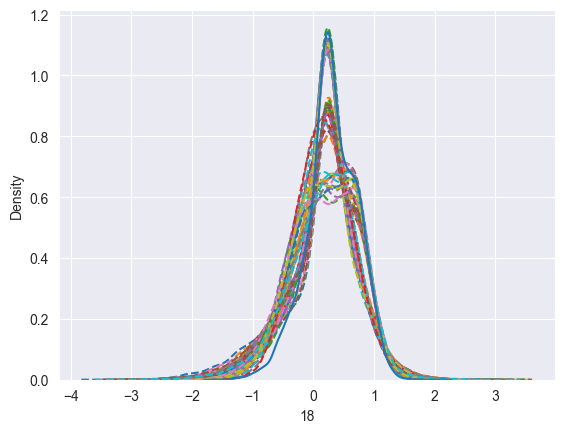

In [6]:
df = pd.concat([train[train.Label==1].iloc[:50], train[train.Label==0].iloc[:1]])

for i, row in df.iterrows():
    sns.kdeplot(row, linestyle= '--' if row.Label==1 else '-')


In [ ]:
false_index

[0,
 6,
 8,
 15,
 16,
 22,
 23,
 32,
 33,
 54,
 55,
 90,
 91,
 104,
 105,
 110,
 111,
 123,
 124,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 150,
 151,
 168,
 169,
 188,
 189,
 207,
 208,
 220,
 221,
 222,
 228,
 229,
 238,
 239,
 240,
 253,
 254,
 263,
 264,
 275,
 277,
 278,
 279,
 293,
 294,
 298,
 299,
 301,
 302,
 309,
 310,
 311,
 312,
 315,
 316,
 329,
 330,
 332,
 334,
 335,
 337,
 338,
 343,
 344,
 363,
 364,
 372,
 373,
 381,
 382,
 393,
 394,
 404,
 405,
 407,
 408,
 413,
 414,
 435,
 436,
 474,
 475,
 487,
 488,
 506,
 507,
 517,
 519,
 520,
 521,
 544,
 545,
 550,
 552,
 553,
 561,
 562,
 566,
 567,
 568,
 569,
 580,
 581,
 583,
 584,
 592,
 605,
 606,
 654,
 655,
 664,
 665,
 674,
 675,
 681,
 682,
 686,
 687]

In [ ]:
len(false_index)

125

<AxesSubplot:xlabel='6', ylabel='Density'>

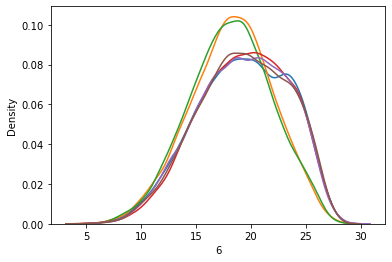

In [ ]:
sns.kdeplot(data_distribution.loc[3])
sns.kdeplot(data_distribution.loc[9])
sns.kdeplot(data_distribution.loc[8])
sns.kdeplot(data_distribution.loc[9])
sns.kdeplot(data_distribution.loc[10])
sns.kdeplot(data_distribution.loc[5])

In [ ]:
data['Label'].loc[0:10]

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     0
10    0
Name: Label, dtype: int64

In [ ]:
Truth_False_index = []
for i in range(699):
    if data['Label'].loc[i]|data['Label'].loc[i+1] == 1:
        Truth_False_index.append(i)

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(label, predict))
print(classification_report(label, predict))


[[162   0]
 [  5  32]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       162
           1       1.00      0.86      0.93        37

    accuracy                           0.97       199
   macro avg       0.99      0.93      0.96       199
weighted avg       0.98      0.97      0.97       199



In [ ]:
True_predict = list(set(Truth_False_index) & set(false_index))
True_predict.sort()
True_predict

[0,
 6,
 8,
 15,
 16,
 22,
 23,
 32,
 33,
 54,
 55,
 90,
 91,
 104,
 105,
 110,
 111,
 123,
 124,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 150,
 151,
 168,
 169,
 188,
 189,
 207,
 208,
 220,
 221,
 222,
 228,
 229,
 238,
 239,
 240,
 253,
 254,
 263,
 264,
 275,
 277,
 278,
 279,
 293,
 294,
 298,
 299,
 301,
 302,
 309,
 310,
 311,
 312,
 315,
 316,
 329,
 330,
 332,
 334,
 335,
 337,
 338,
 343,
 344,
 363,
 364,
 372,
 373,
 381,
 382,
 393,
 394,
 404,
 405,
 407,
 408,
 413,
 414,
 435,
 436,
 474,
 475,
 487,
 488,
 506,
 507,
 517,
 519,
 520,
 521,
 544,
 545,
 550,
 552,
 553,
 561,
 562,
 566,
 567,
 568,
 569,
 580,
 581,
 583,
 584,
 592,
 605,
 606,
 654,
 655,
 664,
 665,
 674,
 675,
 681,
 682,
 686,
 687]

In [ ]:
len(True_predict)

125

In [ ]:
acc = len(True_predict)/len(Truth_False_index)
acc

0.9541984732824428

<AxesSubplot:>

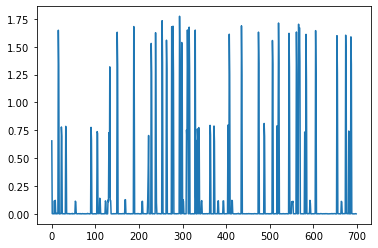

In [ ]:
sns.lineplot(x = [i for i in range(699)], y = psi_list)

In [ ]:
psi_list

[0.6554616446025187,
 0.00307836575997679,
 0.0016816819661602742,
 0.0017428896793646083,
 0.0018763501390288806,
 0.0015975776633448853,
 0.1187231136909347,
 0.0021978240511302135,
 0.12205671593718916,
 0.002081792025107919,
 0.001927601528525303,
 0.005609679946798963,
 0.0017932748837567538,
 0.002321044382126428,
 0.0029702382257913856,
 1.6473720101346967,
 1.3338092976223885,
 0.0003757204011596923,
 0.0006051267062459223,
 0.0024751673960933464,
 0.0017632389869012414,
 0.0019105321799705182,
 0.7799519214407544,
 0.6973027791410468,
 0.0023778842063447454,
 0.0013468578533110545,
 0.0012486121420377289,
 0.002303177703250898,
 0.0017057667486959297,
 0.0007595033755266891,
 0.0008007625724595911,
 0.001420934670916733,
 0.7855862722126412,
 0.6797232013303214,
 0.002874001460901058,
 0.002228300282938395,
 0.0019383228373762188,
 0.0027691890636620383,
 0.002571415406327669,
 0.002203110867574051,
 0.0035659049587503495,
 0.0006075222125100342,
 0.001016310522956398,
 0.0013

0.1187231136909347


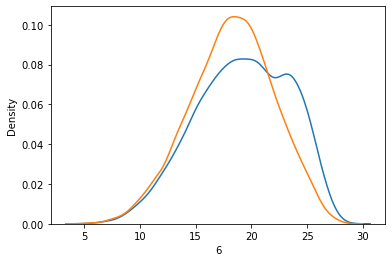

In [ ]:
sns.kdeplot(data_distribution.loc[6])
sns.kdeplot(data_distribution.loc[7])
print(psi_list[6])

0.0021978240511302135


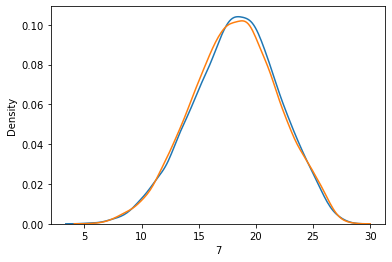

In [ ]:
sns.kdeplot(data_distribution.loc[7])
sns.kdeplot(data_distribution.loc[8])
print(psi_list[7])

0.12205671593718916


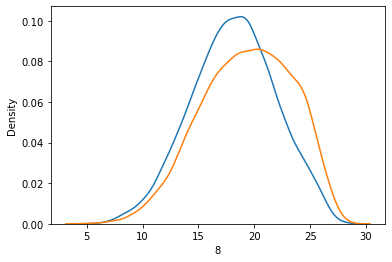

In [ ]:
sns.kdeplot(data_distribution.loc[8])
sns.kdeplot(data_distribution.loc[9])
print(psi_list[8])